In [1]:
import numpy as np
import pandas as pd 

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model,layers
import tensorflow as tf
import keras

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

In [4]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
positive_img = Path(r'C:\Users\metal\anaconda3\codes\crack_detection\images\Positive')
negative_img = Path(r'C:\Users\metal\anaconda3\codes\crack_detection\images\Negative')

In [1]:
# list(positive_img.glob(r"*.jpg"))

In [7]:
def generate_df(image_dir, label):
    filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=filepaths.index)
    df = pd.concat([filepaths, labels], axis=1)
    return df

In [8]:
negative_df = generate_df(negative_img,label="NEGATIVE")

In [9]:
positive_df = generate_df(positive_img,label="POSITIVE")

In [10]:
all_df = pd.concat([positive_df, negative_df], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
all_df

,Filepath,Label
0,C:\Users\metal\anaconda3\codes\crack_detection...,POSITIVE
1,C:\Users\metal\anaconda3\codes\crack_detection...,POSITIVE
2,C:\Users\metal\anaconda3\codes\crack_detection...,POSITIVE
3,C:\Users\metal\anaconda3\codes\crack_detection...,NEGATIVE
4,C:\Users\metal\anaconda3\codes\crack_detection...,POSITIVE
...,...,...
39995,C:\Users\metal\anaconda3\codes\crack_detection...,POSITIVE
39996,C:\Users\metal\anaconda3\codes\crack_detection...,NEGATIVE
39997,C:\Users\metal\anaconda3\codes\crack_detection...,POSITIVE
39998,C:\Users\metal\anaconda3\codes\crack_detection...,POSITIVE


In [11]:
import PIL.Image as Image

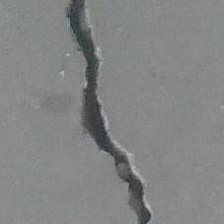

In [12]:
image = Image.open(r'C:\Users\metal\anaconda3\codes\crack_detection\images\Positive\00001.jpg').resize((224,224))
image

In [13]:
all_df.shape

(40000, 2)

In [14]:
from tensorflow.keras.applications import MobileNet

In [48]:
model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Make all the layers in the pre-trained model non-trainable
for layer in model.layers:
     layer.trainable = False

In [49]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 75, 75, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 75, 75, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 75, 75, 32) 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 9, 9, 512)         2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 9, 9, 512)         0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 9, 9, 512)         262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 9, 9, 512)         2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 9, 9, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 9, 9, 512)         4608      
 )        

In [50]:
x = tf.keras.layers.Flatten()(model.output)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)  
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=model.input, outputs=outputs)
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
    
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 75, 75, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 75, 75, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 75, 75, 32)        128 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 9, 9, 512)         2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 9, 9, 512)         0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 9, 9, 512)         262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 9, 9, 512)         2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 9, 9, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 9, 9, 512)         4608      
 )        

In [51]:
train_df, test_df = train_test_split(
    all_df.sample(40000, random_state=1),
    train_size=0.7,
    shuffle=True,
    random_state=1
)

In [52]:
train_df.shape

(28000, 2)

In [53]:
test_df.shape

(12000, 2)

In [54]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [55]:
train_gen

In [46]:
train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='training'
)

val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_data = train_gen.flow_from_dataframe(
    test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=64,
    shuffle=False,
    seed=42
)

Found 22400 validated image filenames belonging to 2 classes.
Found 5600 validated image filenames belonging to 2 classes.
Found 12000 validated image filenames belonging to 2 classes.


In [56]:
history = model.fit_generator(train_data,
            validation_data = val_data,
            epochs = 2,
            verbose = 1,
            )

C:\Users\metal\AppData\Local\Temp\ipykernel_4872\103021663.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data,


Epoch 1/2
350/350 [==============================] - 244s 689ms/step - loss: 0.0400 - accuracy: 0.9915 - val_loss: 0.0301 - val_accuracy: 0.9964
Epoch 2/2
350/350 [==============================] - 239s 684ms/step - loss: 0.0155 - accuracy: 0.9970 - val_loss: 0.0188 - val_accuracy: 0.9979


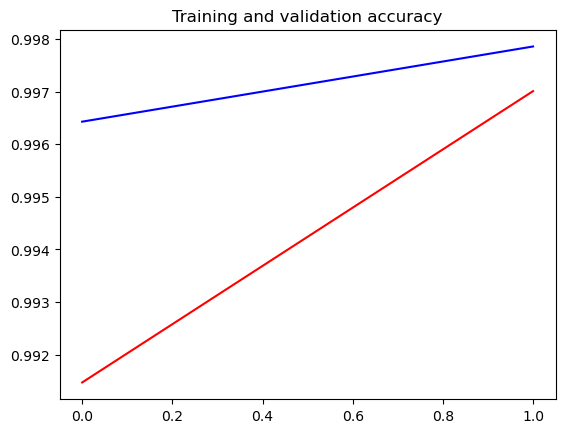

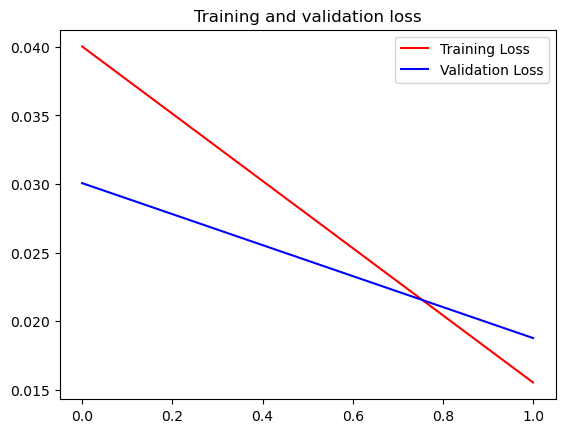

In [57]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [58]:
import seaborn as sns


In [59]:
model.save(r'C:\Users\metal\anaconda3\codes\crack_detection\Crack_Detection_MobileNetV1_model.h5')

C:\Users\metal\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
def evaluate_model(model, test_data):
    
    results = model.evaluate(test_data, verbose=1)
    loss = results[0]
    acc = results[1]
    
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))
    
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(int))
    cm = confusion_matrix(test_data.labels, y_pred)
    clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=[0, 1])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

188/188 [==============================] - 105s 560ms/step - loss: 0.0277 - accuracy: 0.9974
    Test Loss: 0.02767
Test Accuracy: 99.74%
188/188 [==============================] - 104s 549ms/step


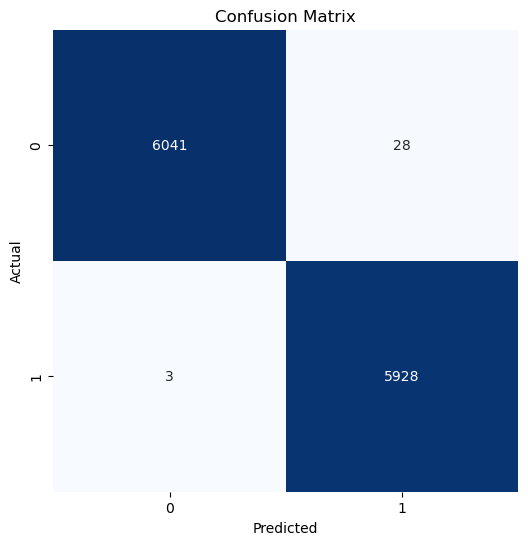

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00      6069
    POSITIVE       1.00      1.00      1.00      5931

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



In [61]:
evaluate_model(model, test_data)

In [1]:
# precision - Of all the instances classified as positive, how many are actually positive
# recall - Of all the actual positive instances, how many did the model correctly identify